In [27]:
import torch
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
import utils.metrics as metrics

In [28]:
root = "/home/sr2/Hyeokjun/OOD-saige/results/wrn28-10_cifar10_godin_hc_gi/logits/"
#root = "/home/sr2/Hyeokjun/OOD-saige/results/wrn_cifar10_godin_hc_gi/logits/"

In [29]:
## Load inlier

# confidences_ok = torch.load(os.path.join(root, "Severstal/ok/confidences.pt"))
# confidences_ok = confidences_ok.squeeze(1)
# confidences_1 = torch.load(os.path.join(root, "Severstal/1/confidences.pt"))
# confidences_1 = confidences_1.squeeze(1)
# confidences_2 = torch.load(os.path.join(root, "Severstal/2/confidences.pt"))
# confidences_2 = confidences_2.squeeze(1)
# ind_scores = torch.cat([confidences_ok, confidences_1, confidences_2]).numpy()


ind_h_confidences = torch.load(os.path.join(root, "cifar10/h_confidences.pt"))
ind_f_confidences = torch.load(os.path.join(root, "cifar10/f_confidences.pt"))
ind_h_scores = ind_h_confidences.squeeze(1).numpy()
ind_f_scores = ind_f_confidences.squeeze(1).numpy()
ind_logits = torch.load(os.path.join(root, "cifar10/logits.pt"))
ind_targets = torch.load(os.path.join(root, "cifar10/targets.pt"))


In [33]:
## Load outlier

# confidences_3 = torch.load(os.path.join(root, "Severstal/3/confidences.pt"))
# confidences_3 = confidences_3.squeeze(1)
# confidences_4 = torch.load(os.path.join(root, "Severstal/4/confidences.pt"))
# confidences_4 = confidences_4.squeeze(1)
# ood_scores = torch.cat([confidences_3, confidences_4]).numpy()

ood_dataset = "lsun_resize"
ood_h_confidences = torch.load(os.path.join(root, ood_dataset, "h_confidences.pt"))
ood_f_confidences = torch.load(os.path.join(root, ood_dataset, "f_confidences.pt"))
ood_h_scores = ood_h_confidences.squeeze(1).numpy()
ood_f_scores = ood_f_confidences.squeeze(1).numpy()
ood_logits = torch.load(os.path.join(root, ood_dataset, "logits.pt"))
ood_targets = torch.load(os.path.join(root, ood_dataset, "targets.pt"))

# conf_list = []
# for target in os.listdir(os.path.join(root, "Severstal")):
#     if "ipynb" in target:
#         continue
#     conf = torch.load(os.path.join(root, "Severstal", target, "confidences.pt")).squeeze(1)
#     conf_list.append(conf)
# ood_scores = torch.cat(conf_list).numpy()

In [34]:
## Plot confidence score
def plot_confidences(ind_scores, ood_scores):
    ind_max, ind_min = np.max(ind_scores), np.min(ind_scores)
    ood_max, ood_min = np.max(ood_scores), np.min(ood_scores)


    ranges = (ind_min if ind_min < ood_min else ood_min, ind_max if ind_max > ood_max else ood_max)
    ranges

    fig=plt.figure()
    sns.distplot(ind_scores.ravel(), hist_kws={'range': ranges}, kde=False, bins=50, norm_hist=True, label='In-distribution')
    sns.distplot(ood_scores.ravel(), hist_kws={'range': ranges}, kde=False, bins=50, norm_hist=True, label='Out-of-distribution')
    plt.xlabel('Confidence')
    plt.ylabel('Density')
    fig.legend()

AUROC: 0.8753767323267673 | AUPR: 0.8782964494526365 | FPR95: 0.543045695430457
acc:  0.9172
acc_w_ood:  0.7873606085777283


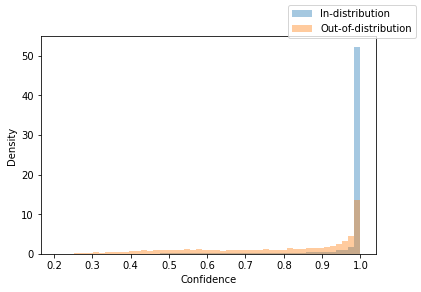

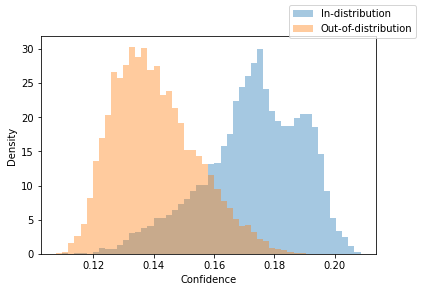

In [35]:
## Metrics
plot_confidences(ind_f_scores, ood_f_scores)
plot_confidences(ind_h_scores, ood_h_scores)

confidences = torch.cat((ind_confidences, ood_confidences), 0)
logits = torch.cat((ind_logits, ood_logits), 0)

targets = ind_targets
(auroc, aupr, fpr) = metrics.get_ood_measures(confidences, targets)
print("AUROC: {} | AUPR: {} | FPR95: {}".format(auroc, aupr, fpr))
num_topks_correct = metrics.topks_correct(logits[:len(targets)], targets, (1,))
[top1_correct] = [x for x in num_topks_correct]
print("acc: ", top1_correct.item() / targets.size(0))

acc_w_ood = metrics.classify_acc_w_ood(logits, targets, confidences)
print("acc_w_ood: ", acc_w_ood.item())